In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os

## Importing dataframes

In [2]:
path=r'C:\Users\solom\Desktop\Instacart Basket Analysis'

In [3]:
ords_prods_cust= pd.read_pickle(os.path.join(path, '02 Data', 'Manipulated Data', 'ords_prods_cust_combined.pkl'))

In [4]:
## Check all colums in the dataframe
ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'first_name', 'surname', 'Gender', 'state', 'Age',
       'date_joined', 'number_of_dependants', 'family_status', 'income'],
      dtype='object')

### Changing data types

In [5]:
ords_prods_cust['order_id'] = ords_prods_cust['order_id'].astype('str')

In [6]:
ords_prods_cust['user_id'] = ords_prods_cust['user_id'].astype('str')

In [7]:
ords_prods_cust.dtypes

product_id                             int64
product_name                          object
aisle_id                               int64
department_id                          int64
prices                               float64
order_id                              object
user_id                               object
order_number                           int64
orders_day_of_week                     int64
order_hour_of_day                      int64
days_since_previous_order            float64
add_to_cart_order                      int64
reordered                              int64
_merge                              category
price_label                           object
busiest_day                           object
busiest_days                          object
busiest_period_of_day                 object
max_order                              int64
loyalty_flag                          object
mean_product_price                   float64
spending_flag                         object
median_day

## Customer names should be dropped for security reasons

In [8]:
ords_prods_cust.drop(['first_name', 'surname'], axis=1, inplace = True)

In [9]:
# Checking columns after removal of name columns
ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'Gender', 'state', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

In [10]:
ords_prods_cust.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2  3160996     138             1                   5                 13  ...   
3  2254091     138            10                   5                 14  ...   
4   505689     138             9                   6                 12  ...   

   spending_flag  median_days_between_orders    order_frequency Gender  \
0    Low spender                         8.0  Frequent customer   Male   
1    Low spender                         8.0  Frequent customer   Male   
2    Low spender                         8.0  Frequent customer   Male   
3    Low spender                         8.0  Frequent customer   Male   
4    Low spender                         8.0  Frequent customer   Male   

       state Age date_joined number_of_dependants  family_status income  
0  Minnesota  81  2019-08-01                    1        married  49620  
1  Minnesota  81  2019-08-01                    1        married  49620  
2  Minnesota  81  2019-08-01                    1        married  49620  
3  Minnesota  81  2019-08-01                    1        married  49620  
4  Minnesota  81  2019-08-01                    1        married  49620  

[5 rows x 31 columns]

## Creating regions based on the state the customer lives

### Making list of states for each region

In [11]:
Northeastern_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [12]:
Midwestern_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [13]:
Southern_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [14]:
Western_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

### Now we have to match the data for each state to the region column created

In [15]:
ords_prods_cust.loc[ords_prods_cust['state'].isin(Northeastern_states), 'Region'] = 'Northeast'

In [16]:
ords_prods_cust.loc[ords_prods_cust['state'].isin(Midwestern_states), 'Region'] = 'Midwest'

In [17]:
ords_prods_cust.loc[ords_prods_cust['state'].isin(Southern_states), 'Region'] = 'South'

In [18]:
ords_prods_cust.loc[ords_prods_cust['state'].isin(Western_states), 'Region'] = 'West'

In [19]:
# Checking columns to see the new Region column created
ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'Gender', 'state', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'Region'],
      dtype='object')

In [20]:
# Find the frequency of customers for each region
ords_prods_cust['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Spending habits for each Region in the US

In [21]:
# create table for region and spending flag
region_spending_habit = pd.crosstab(ords_prods_cust['Region'], ords_prods_cust['spending_flag'], dropna = False)

In [22]:
region_spending_habit

spending_flag  High spender  Low spender
Region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559

In [23]:
ords_prods_cust.groupby('Region').agg({'prices' : ['mean']})

prices
                mean
Region              
Midwest    12.715483
Northeast  11.554997
South      12.195577
West       11.319834

## Creating a exclusion flag for low activity customers who have less than 5 orders

In [24]:
# create low-activity flag
ords_prods_cust.loc[ords_prods_cust['order_number'] < 5, 'low_activity'] = 'yes'

In [25]:
ords_prods_cust.loc[ords_prods_cust['order_number'] >= 5, 'low_activity'] = 'no'

In [26]:
# create table including only high_activity customers
high_activity = ords_prods_cust[ords_prods_cust['low_activity'] == 'no']

In [27]:
ords_prods_cust.shape

(32404859, 33)

In [28]:
high_activity.shape

(24414877, 33)

In [29]:
# Check frequency of customer who are low customers and those are not and compare it with the high_activity table rows
ords_prods_cust['low_activity'].value_counts(dropna = False)

low_activity
no     24414877
yes     7989982
Name: count, dtype: int64

In [30]:
# Exporting sample data with high activity customers
high_activity.to_pickle(os.path.join(path, '02 Data', 'Manipulated Data', 'high_activity_spending.pkl'))

## Customer profile based on Project Brief


### Shopping behavior throughout the week

In [31]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [32]:
bar= ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.xticks(rotation='horizontal')
plt.ylabel('Number of orders')
plt.xlabel('Customer shopping day')
plt.title(' Customer Spending Habit throughout the week')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_shopping_day.png'))

In [33]:
# Flag for Weekday Shopper Monday- Friday
ords_prods_cust.loc[ords_prods_cust['orders_day_of_week'].between(2, 6), 'shopping_day'] = 'Weekday shopper'

In [34]:
# Flag for Weekday Shopper Monday- Friday
ords_prods_cust.loc[ords_prods_cust['orders_day_of_week'].between(0, 1), 'shopping_day'] = 'Weekend shopper'

In [35]:
# Frequency of days
ords_prods_cust['shopping_day'].value_counts(dropna = False)

shopping_day
Weekday shopper    20540447
Weekend shopper    11864412
Name: count, dtype: int64

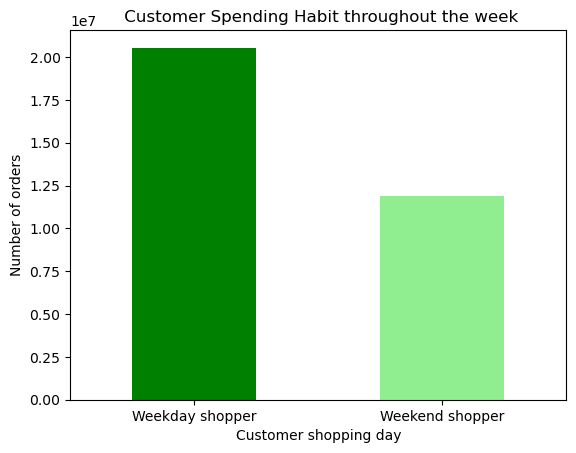

In [36]:
# Shopping behavior of customers throughout the day chart
bar_shopping_day = ords_prods_cust['shopping_day'].value_counts().plot.bar(color=['Green', '#90EE90'])
plt.xticks(rotation='horizontal')
plt.ylabel('Number of orders')
plt.xlabel('Customer shopping day')
plt.title(' Customer Spending Habit throughout the week')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_shopping_week.png'))

In [37]:
# Pie chart for shopping day
# Frequency of customer shopping days in a week
day_cnts = ords_prods_cust['shopping_day'].value_counts()
# Creating the pie chart
behavior_pie = plt.pie(day_cnts,labels = day_cnts.index, autopct='%1.2f%%', colors=['Red', 'Orange'])
# Title
plt.title('Shopping habit thoughout the day')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Shopping_day_pie.png'))

### Shopping behavior throughout the day

In [38]:
# Flag for Early morning shopper 5AM-9AM
ords_prods_cust.loc[ords_prods_cust['order_hour_of_day'].between(5, 9), 'shopping_behavior'] = 'Early morning shopper'

In [39]:
# Flag for Late night shopper 10PM-4AM
ords_prods_cust.loc[(ords_prods_cust['order_hour_of_day'] >= 22) | (ords_prods_cust['order_hour_of_day'] < 5), 'shopping_behavior'] = 'Late night shopper'

In [40]:
# Flag for Regular shopper 10AM-9PM
ords_prods_cust.loc[ords_prods_cust['order_hour_of_day'].between(10, 21), 'shopping_behavior'] = 'Regular shopper'

In [41]:
# Frequency of type of shopper
ords_prods_cust['shopping_behavior'].value_counts(dropna = False)

shopping_behavior
Regular shopper          25418122
Early morning shopper     5441829
Late night shopper        1544908
Name: count, dtype: int64

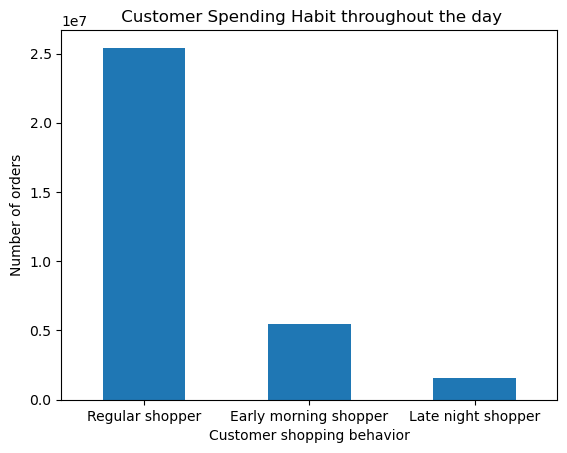

In [42]:
# Shopping behavior of customers throughout the day chart
bar_shopping_habit = ords_prods_cust['shopping_behavior'].value_counts().plot.bar()
plt.xticks(rotation='horizontal')
plt.ylabel('Number of orders')
plt.xlabel('Customer shopping behavior')
plt.title(' Customer Spending Habit throughout the day')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_shopping_habit.png'))

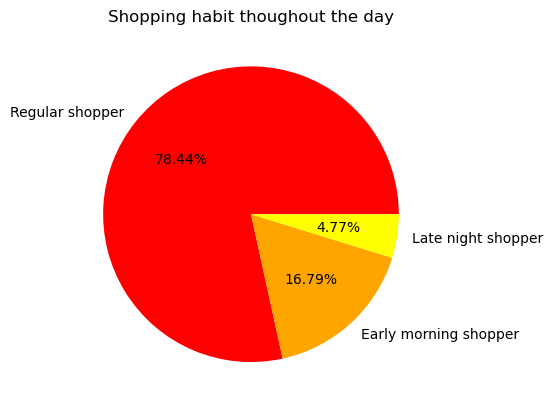

In [43]:
# Pie chart for shopping behavior
# Frequency of customer shopping behavior
habit_cnts = ords_prods_cust['shopping_behavior'].value_counts()
# Creating the pie chart
behavior_pie = plt.pie(habit_cnts,labels = habit_cnts.index, autopct='%1.2f%%', colors=['Red', 'Orange', 'Yellow'])
# Title
plt.title('Shopping habit thoughout the day')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Shopping_habit_pie.png'))

## Customer expenditure for all types of shoppers

In [44]:
# find the expenditure for each order for each customer
order_behavior = ords_prods_cust.groupby(['shopping_behavior', 'user_id', 'order_number', 'order_frequency'])['prices'].sum().reset_index()

In [45]:
order_behavior.head(20)

shopping_behavior user_id  order_number        order_frequency  prices
0   Early morning shopper       1             1  Non-frequent customer    31.6
1   Early morning shopper       1             2  Non-frequent customer    35.4
2   Early morning shopper       1             4  Non-frequent customer    26.0
3   Early morning shopper       1             6  Non-frequent customer    25.0
4   Early morning shopper       1             7  Non-frequent customer    29.0
5   Early morning shopper       1            10  Non-frequent customer    63.1
6   Early morning shopper   10000             2      Frequent customer    83.0
7   Early morning shopper   10000             6      Frequent customer   156.3
8   Early morning shopper   10000            10      Frequent customer   272.3
9   Early morning shopper   10000            11      Frequent customer   150.6
10  Early morning shopper   10000            18      Frequent customer   135.5
11  Early morning shopper   10000            19      Frequent customer   202.7
12  Early morning shopper   10000            21      Frequent customer   268.6
13  Early morning shopper   10000            27      Frequent customer   112.9
14  Early morning shopper   10000            28      Frequent customer   140.8
15  Early morning shopper   10000            29      Frequent customer    11.8
16  Early morning shopper   10000            31      Frequent customer   116.4
17  Early morning shopper   10000            32      Frequent customer    19.9
18  Early morning shopper   10000            33      Frequent customer   180.9
19  Early morning shopper   10000            34      Frequent customer    71.6

In [46]:
# find the expenditure statistics for each customer 
shopper_behavior = order_behavior.groupby(['shopping_behavior', 'user_id'])['prices'].agg(['min', 'max', 'mean']).reset_index()

In [47]:
shopper_behavior

shopping_behavior user_id    min    max        mean
0       Early morning shopper       1   25.0   63.1   35.016667
1       Early morning shopper   10000   11.8  272.3  137.288889
2       Early morning shopper  100000   44.9  247.4  126.500000
3       Early morning shopper  100001    9.8  180.3   83.637500
4       Early morning shopper  100003  130.9  130.9  130.900000
...                       ...     ...    ...    ...         ...
397885        Regular shopper   99995   42.6  132.5   79.580000
397886        Regular shopper   99996    2.8  114.8   69.920000
397887        Regular shopper   99997   31.6  145.5   95.500000
397888        Regular shopper   99998   20.9   51.2   40.433333
397889        Regular shopper   99999    9.9  159.7   69.879167

[397890 rows x 5 columns]

In [48]:
# Expenditure for each type of customer habit
customer_habit_price = shopper_behavior.groupby('shopping_behavior').agg({'min':'min', 'max':'max', 'mean':'mean'}).reset_index()

In [49]:
customer_habit_price

shopping_behavior  min       max        mean
0  Early morning shopper  1.0  100305.3  129.293556
1     Late night shopper  1.0  100290.2  114.900456
2        Regular shopper  1.0  100452.9  126.836886

### Average shopping expenditure for each shopping habit

In [50]:
# create table with average order expense 
bar_customer_habit = sns.barplot(x = 'shopping_behavior', y = 'mean', data = customer_habit_price, color = 'Yellow')

# add axis and title labels
plt.xlabel('Customer shopping behavior')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure for each shopping habit')
plt.xticks(rotation = 'horizontal')

# save bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Average_expenditure.png'))

## Shopping habit for each region and department
### Region

In [51]:
# create a crosstable with shopping behavior and Region
region_customer_habit = pd.crosstab(ords_prods_cust['Region'], ords_prods_cust['shopping_behavior'], dropna = False)

In [52]:
region_customer_habit

shopping_behavior  Early morning shopper  Late night shopper  Regular shopper
Region                                                                       
Midwest                          1266407              363458          5967460
Northeast                         960345              280515          4481876
South                            1829176              512458          8450251
West                             1385901              388477          6518535

In [53]:
# Making clustered bar graph
region_habit_full= region_customer_habit.reset_index().melt(id_vars='Region', var_name='shopping_behavior', value_name='count')

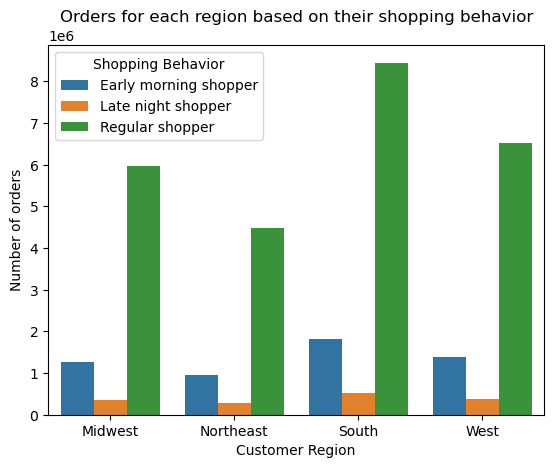

In [54]:
# create clustered bar graph for shopping behavior and region
Region_habit_bar = sns.barplot(x='Region', y='count', hue='shopping_behavior', data=region_habit_full)
plt.xlabel('Customer Region')
plt.ylabel('Number of orders')
plt.title('Orders for each region based on their shopping behavior')
plt.legend(title='Shopping Behavior')
plt.xticks(rotation = 'horizontal')

# save bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Region_shopping_habit.png'))

In [55]:
# create a crosstable with day of week and Region
region_customer_day = pd.crosstab(ords_prods_cust['orders_day_of_week'], ords_prods_cust['Region'], dropna = False)

In [56]:
region_customer_day

Region              Midwest  Northeast    South     West
orders_day_of_week                                      
0                   1460186    1097258  2052776  1593962
1                   1320759     999953  1892057  1447461
2                    991770     746153  1404662  1071245
3                    895093     679308  1287335   978798
4                    888131     666326  1258537   970808
5                    983262     746455  1399737  1076337
6                   1058124     787283  1496781  1154302

In [57]:
# Making clustered line chart
region_day_full= region_customer_day.reset_index().melt(id_vars='orders_day_of_week', var_name='Region', value_name='count')

In [58]:
# create clustered line chart for day of week and region
region_day_line = sns.lineplot(x='orders_day_of_week', y='count', hue='Region', data=region_day_full)
plt.xlabel('Order day')
plt.ylabel('Number of orders')
plt.title('Orders for each day based on Region')
plt.legend(title='Customer Region')
plt.xticks(rotation = 'horizontal')

# save bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Region_day_orders.png'))

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [59]:
# create a crosstable with hour of day and Region
region_customer_hour = pd.crosstab(ords_prods_cust['order_hour_of_day'], ords_prods_cust['Region'], dropna = False)

In [60]:
region_customer_hour

Region             Midwest  Northeast   South    West
order_hour_of_day                                    
0                    50748      38557   73297   56167
1                    27360      21543   37906   28891
2                    16987      12436   21980   17972
3                    11909       9218   17437   12717
4                    12690       9507   17966   13079
5                    19858      15395   30838   21870
6                    67296      50545   98696   73956
7                   208272     158950  297744  226088
8                   398142     305344  579045  435587
9                   572839     430111  822853  628400
10                  646591     484872  923301  706996
11                  641858     482845  909371  702066
12                  612342     465634  868596  671960
13                  618737     472706  879532  689979
14                  625122     475355  893190  695469
15                  628164     470195  882322  681463
16                  597360     446411  841034  650397
17                  491290     366163  694879  535322
18                  388755     287375  543568  416804
19                  296696     219259  423557  318793
20                  231243     170719  324171  250023
21                  189302     140342  266730  199263
22                  151260     114499  208898  159568
23                   92504      74755  134974  100083

In [61]:
# Making clustered line chart
region_hour_full= region_customer_hour.reset_index().melt(id_vars='order_hour_of_day', var_name='Region', value_name='count')

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


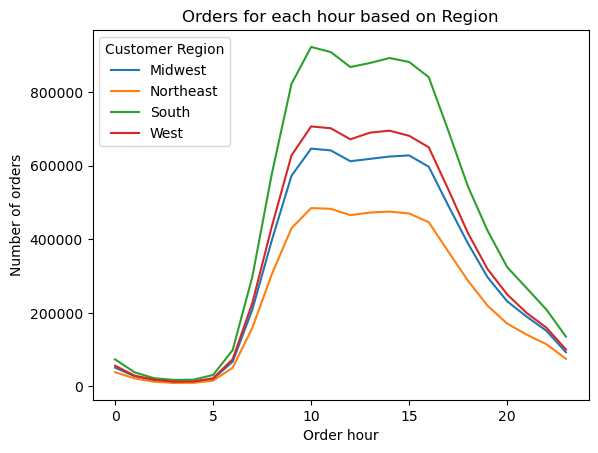

In [62]:
# create clustered line chart for hour of day and region
region_hour_line = sns.lineplot(x='order_hour_of_day', y='count', hue='Region', data=region_hour_full)
plt.xlabel('Order hour')
plt.ylabel('Number of orders')
plt.title('Orders for each hour based on Region')
plt.legend(title='Customer Region')
plt.xticks(rotation = 'horizontal')

# save bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Region_hour_orders.png'))

### Department

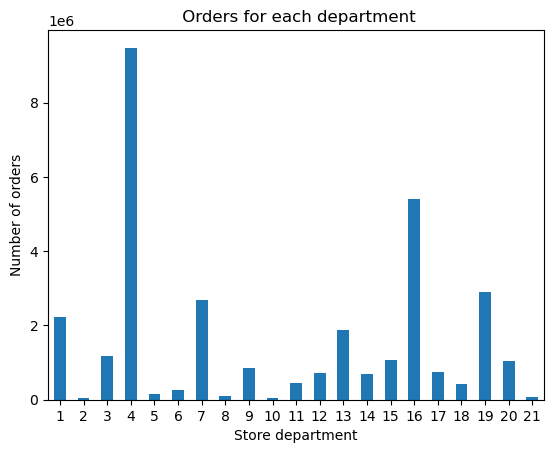

In [63]:
bar1= ords_prods_cust['department_id'].value_counts().sort_index().plot.bar()
plt.xticks(rotation='horizontal')
plt.ylabel('Number of orders')
plt.xlabel('Store department')
plt.title(' Orders for each department')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_orders.png'))

In [64]:
# create a crosstable with shopping behavior and department id
department_customer_habit = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['shopping_behavior'], dropna = False)

In [65]:
department_customer_habit

shopping_behavior  Early morning shopper  Late night shopper  Regular shopper
department_id                                                                
1                                 334181              108926          1791636
2                                   5797                1725            28769
3                                 200424               51760           920244
4                                1607540              481975          7389776
5                                  18722                3771           131203
6                                  40448               13607           215198
7                                 458352              116550          2113221
8                                  14668                4323            78725
9                                 134995               42079           689553
10                                  5878                1754            26941
11                                 72807               22089           352676
12                                114537               33153           561237
13                                297800               93748          1483821
14                                129642               32374           541017
15                                167375               51920           848763
16                                960355              251196          4187196
17                                126245               34878           577543
18                                 86035               21161           316606
19                                486181              125349          2276020
20                                168657               48934           833658
21                                 11190                3636            54319

In [66]:
# Making clustered bar graph
department_habit_full= department_customer_habit.reset_index().melt(id_vars='department_id', var_name='shopping_behavior', value_name='count')

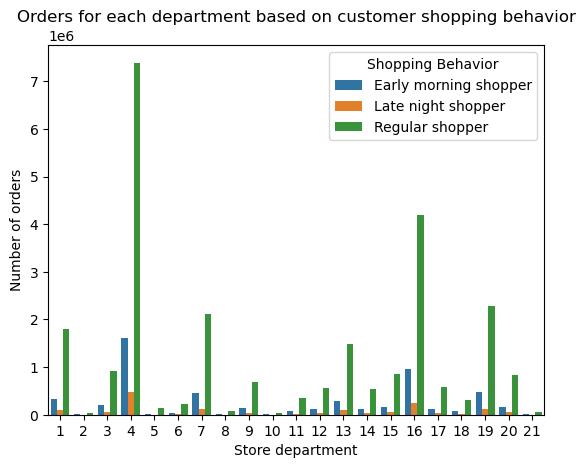

In [67]:
# create clustered bar graph for shopping behavior and department
department_habit_bar = sns.barplot(x='department_id', y='count', hue='shopping_behavior', data=department_habit_full)
plt.xlabel('Store department')
plt.ylabel('Number of orders')
plt.title('Orders for each department based on customer shopping behavior')
plt.legend(title='Shopping Behavior')
plt.xticks(rotation = 'horizontal')

# save bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_shopping_habit.png'))

### Shopping habit based on loyalty

In [68]:
# create a crosstable with shopping behavior and loyaalty flag
loyalty_customer_habit = pd.crosstab(ords_prods_cust['loyalty_flag'], ords_prods_cust['shopping_behavior'], dropna = False)

In [69]:
loyalty_customer_habit

shopping_behavior  Early morning shopper  Late night shopper  Regular shopper
loyalty_flag                                                                 
Loyal customer                   2015544              469653          7798896
New customer                      860277              307925          5075788
Regular customer                 2566008              767330         12543438

In [70]:
# Making clustered line chart
loyalty_habit_full= loyalty_customer_habit.reset_index().melt(id_vars='loyalty_flag', var_name='shopping_behavior', value_name='count')

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


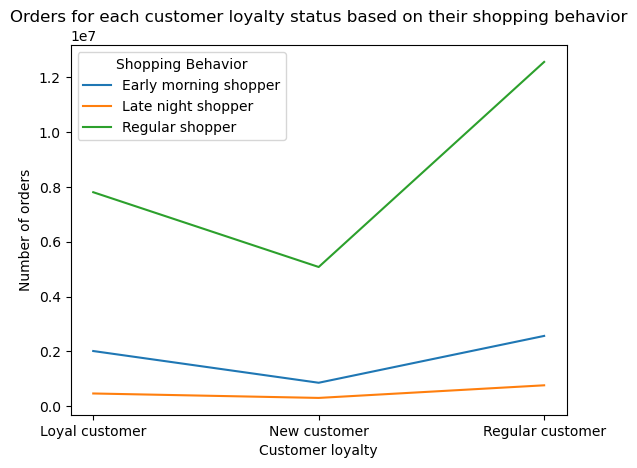

In [71]:
# create clustered line chart for shopping behavior and customer loyalty
loyalty_habit_line = sns.lineplot(x='loyalty_flag', y='count', hue='shopping_behavior', data=loyalty_habit_full)
plt.xlabel('Customer loyalty')
plt.ylabel('Number of orders')
plt.title('Orders for each customer loyalty status based on their shopping behavior')
plt.legend(title='Shopping Behavior')
plt.xticks(rotation = 'horizontal')

# save line chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_shopping_habit.png'))

### Family status customer habits

In [72]:
bar2= ords_prods_cust['family_status'].value_counts().sort_index().plot.bar(color=['Orange', 'Yellow', 'Purple', 'Red'])
plt.xticks(rotation='horizontal')
plt.ylabel('Number of orders')
plt.xlabel('Family Status')
plt.title(' Orders for each customer with a family status')
plt.xticks(rotation = 10)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_status_orders.png'))

In [73]:
# Expenditure for each type of family status
family_expenditure=ords_prods_cust.groupby('family_status')['prices'].sum()

In [74]:
family_expenditure=pd.DataFrame(family_expenditure).reset_index()

In [75]:
# Creating line chart for the sum of expenditure for each family status
line1=sns.lineplot(data=family_expenditure,x='family_status',y='prices')
plt.ylabel('Expenditure')
plt.xlabel('Family Status')
plt.title('Total Expenditure for each family status')
plt.xticks(rotation=10)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Expenditure_sfamily_status.png'))

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [77]:
# create a crosstable with shopping behavior and family status
family_status_habit = pd.crosstab(ords_prods_cust['family_status'], ords_prods_cust['shopping_behavior'], dropna = False)

In [78]:
family_status_habit

shopping_behavior                 Early morning shopper  Late night shopper  \
family_status                                                                 
divorced/widowed                                 467327              130591   
living with parents and siblings                 257521               76040   
married                                         3817265             1079401   
single                                           899716              258876   

shopping_behavior                 Regular shopper  
family_status                                      
divorced/widowed                          2173894  
living with parents and siblings          1217042  
married                                  17860087  
single                                    4167099

In [79]:
# Making clustered bar graph
family_status_full= family_status_habit.reset_index().melt(id_vars='family_status', var_name='shopping_behavior', value_name='count')

In [80]:
# create clustered bar graph for shopping behavior and family status
family_status_bar = sns.barplot(x='family_status', y='count', hue='shopping_behavior', data=family_status_full)
plt.xlabel('Family Status')
plt.ylabel('Number of orders')
plt.title('Orders for each family status based on customer shopping behavior')
plt.legend(title='Shopping Behavior')
plt.xticks(rotation = 10)

# save bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_habit.png'))

### Age customer habits

In [81]:
ords_prods_cust['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [82]:
# Flag for Young shopper 18-30 years
ords_prods_cust.loc[ords_prods_cust['Age'].between(18, 30), 'Age_group'] = 'Young shopper'

In [83]:
# Flag for Middle age shopper 31-60 years
ords_prods_cust.loc[ords_prods_cust['Age'].between(31, 60), 'Age_group'] = 'Middle age shopper'

In [84]:
# Flag for Old age shopper 61-81 years
ords_prods_cust.loc[ords_prods_cust['Age'].between(61, 81), 'Age_group'] = 'Old age shopper'

In [85]:
ords_prods_cust['Age_group'].value_counts(dropna = False)

Age_group
Middle age shopper    15222661
Old age shopper       10582839
Young shopper          6599359
Name: count, dtype: int64

In [86]:
# create a crosstable with shopping behavior and age group
age_group_habit = pd.crosstab(ords_prods_cust['Age_group'], ords_prods_cust['shopping_behavior'], dropna = False)

In [87]:
age_group_habit

shopping_behavior   Early morning shopper  Late night shopper  Regular shopper
Age_group                                                                     
Middle age shopper                2553435              730357         11938869
Old age shopper                   1782700              500274          8299865
Young shopper                     1105694              314277          5179388

In [88]:
# Making clustered line chart
age_habit_full= age_group_habit.reset_index().melt(id_vars='Age_group', var_name='shopping_behavior', value_name='count')

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


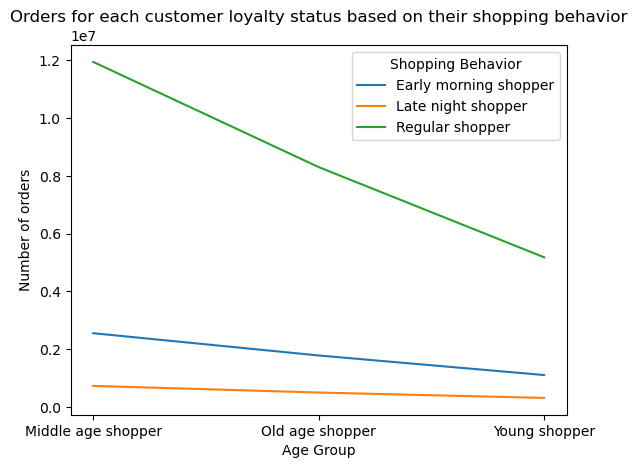

In [89]:
# create clustered line chart for shopping behavior and age group
age_habit_line = sns.lineplot(x='Age_group', y='count', hue='shopping_behavior', data=age_habit_full)
plt.xlabel('Age Group')
plt.ylabel('Number of orders')
plt.title('Orders for each customer loyalty status based on their shopping behavior')
plt.legend(title='Shopping Behavior')
plt.xticks(rotation = 'horizontal')

# save line chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_habit.png'))

### Brand loyalty

In [90]:
# Frequency of customers
loyalty_cnts = ords_prods_cust['loyalty_flag'].value_counts()
# Creating the pie chart
Loyalty_pie = plt.pie(loyalty_cnts,labels = loyalty_cnts.index, autopct='%1.2f%%', colors=['Red', 'Orange','Yellow'])
plt.title('Brand Loyalty')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Brand_loyalty.png'))